In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
d= p.read_csv("hotel_experience.csv")
d.head()

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,0,32746,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,1,52532,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,2,62644,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,3,57270,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,4,18607,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad


In [2]:
d["overall_score"]=d["Hotel wifi service"]+d["Departure/Arrival  convenience"]+d["Ease of Online booking"]+d["Hotel location"]+d["Food and drink"]+d["Stay comfort"]+d["Common Room entertainment"]+d["Checkin/Checkout service"]+d["Other service"]+d["Cleanliness"]
d.head()

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience,overall_score
0,0,32746,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good,40
1,1,52532,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good,31
2,2,62644,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad,26
3,3,57270,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad,28
4,4,18607,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad,33


In [3]:
d.info

<bound method DataFrame.info of        Unnamed: 0      id  Gender  Age purpose_of_travel   Type of Travel  \
0               0   32746  Female   32          academic     Group Travel   
1               1   52532    Male   44          business     Group Travel   
2               2   62644    Male   64           tourism  Personal Travel   
3               3   57270  Female   36          academic     Group Travel   
4               4   18607  Female   80           tourism     Group Travel   
...           ...     ...     ...  ...               ...              ...   
99995       99995   74699  Female   14          business  Personal Travel   
99996       99996   20343    Male   37           tourism     Group Travel   
99997       99997   69947    Male   29          academic     Group Travel   
99998       99998  127543  Female   25          academic     Group Travel   
99999       99999   57660  Female   64           tourism  Personal Travel   

         Type Of Booking  Hotel wifi servic

In [4]:
d.shape

(100000, 19)

In [5]:
from sklearn import preprocessing

In [6]:
l= preprocessing.LabelEncoder()
d["Gender_n"]=l.fit_transform(d["Gender"])                           #Female:0 male: 1 
d["purpose_of_travel_n"]=l.fit_transform(d["purpose_of_travel"])     #academic:0 aviation:1 business:2 personal:3 tourism:4 
d["Type of Travel_n"]=l.fit_transform(d["Type of Travel"])           #Group Travel:0 Personal Travel:1
d["Type Of Booking_n"]=l.fit_transform(d["Type Of Booking"])         #Group bookings:0 Individual/Couple:1 
d["overall experience_n"]=l.fit_transform(d["overall experience"])   #bad:0 good:1
d1=d.drop(["Gender","purpose_of_travel","Type of Travel","Type Of Booking","overall experience"], axis='columns')
d1.head()

,Unnamed: 0,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall_score,Gender_n,purpose_of_travel_n,Type of Travel_n,Type Of Booking_n,overall experience_n
0,0,32746,32,5,5,2,5,5,5,5,1,2,5,40,0,0,0,1,1
1,1,52532,44,3,3,3,3,5,3,4,2,4,1,31,1,2,0,0,1
2,2,62644,64,3,5,3,3,1,1,1,3,5,1,26,1,4,1,1,0
3,3,57270,36,2,4,4,4,4,3,2,1,2,2,28,0,0,0,0,0
4,4,18607,80,2,4,2,5,4,4,4,2,2,4,33,0,4,0,1,0


In [7]:
d1.describe()

,Unnamed: 0,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall_score,Gender_n,purpose_of_travel_n,Type of Travel_n,Type Of Booking_n,overall experience_n
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,64913.421530,39.366210,2.729420,3.061710,2.756860,2.977420,3.201540,3.438900,3.358360,3.303730,3.640560,3.285910,31.75441,0.492400,2.051760,0.310440,0.594540,0.433310
std,28867.657797,37469.018138,15.122459,1.327962,1.524823,1.398951,1.276803,1.329879,1.319433,1.333123,1.265509,1.176213,1.312449,7.06413,0.499945,1.583005,0.462676,0.620714,0.495535
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,32513.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,27.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,64794.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,32.00000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,74999.250000,97384.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,37.00000,1.000000,4.000000,1.000000,1.000000,1.000000
max,99999.000000,129879.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,50.00000,1.000000,4.000000,1.000000,2.000000,1.000000


In [8]:
d2=d.drop(['Hotel wifi service','Departure/Arrival  convenience','Ease of Online booking','Hotel location','Food and drink','Stay comfort','Common Room entertainment','Checkin/Checkout service','Other service','Cleanliness','purpose_of_travel','Type of Travel','Type Of Booking','Unnamed: 0','id','Gender','overall experience','purpose_of_travel_n','Type of Travel_n','Type Of Booking_n'], axis='columns')
d2.head()

,Age,overall_score,Gender_n,overall experience_n
0,32,40,0,1
1,44,31,1,1
2,64,26,1,0
3,36,28,0,0
4,80,33,0,0


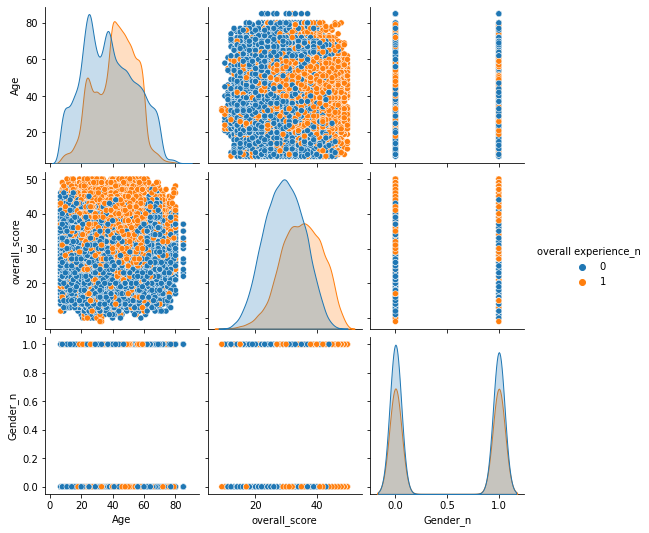

In [9]:
import seaborn as s
s.pairplot(d2,hue='overall experience_n')
m.show()

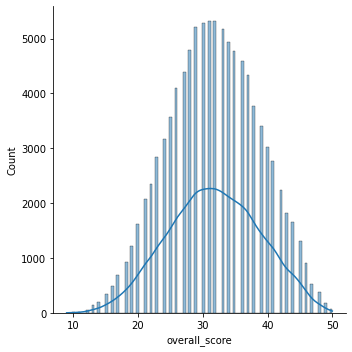

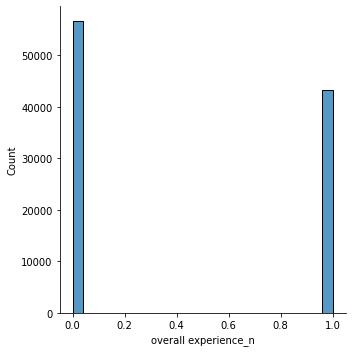

In [10]:
s.displot(d2['overall_score'],kde=True)     #most people had bad experience
s.displot(d2['overall experience_n'],kde=False)   #maximum gave a overall score in a range 25-35
m.show()

In [11]:
print(max(d1['overall_score']))
print(len(d1[d1['overall_score']==50]))
print(min(d1['overall_score']))
print(len(d1[d1['overall_score']==9]))

50
64
9
2


<AxesSubplot:xlabel='Gender', ylabel='overall_score'>

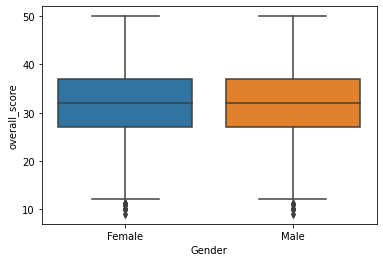

In [12]:
s.boxplot(x='Gender',y='overall_score',data=d)

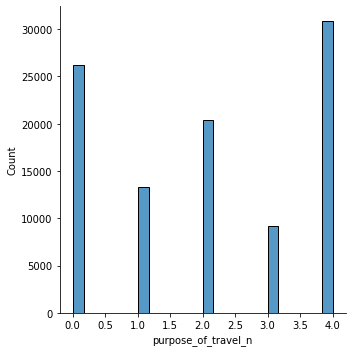

In [13]:
s.displot(d1['purpose_of_travel_n'],kde=False)    #max people travel for tourism and min for personal reason

In [14]:
target=d1['overall experience_n']

In [15]:
def entropy(data):
    groups,group_count=n.unique(data,return_counts=True)
    e_value=n.sum([-(group_count[i]/n.sum(group_count))*n.log2(group_count[i]/n.sum(group_count)) for i in range(len(groups))])
    return e_value
def cal_ig(data,attributes,target):
    d_evalue= entropy(data[target])
    attributes,attributes_count=n.unique(data[attributes],return_counts=True)
    weighted_att_e= n.sum([(attributes_count[i]/n.sum(attributes_count))*entropy(data.where(data[attributes]==attributes[i]).dropna[target]) for i in range(len(attributes))])
    ig= d_evalue - weighted_att_e
    return ig

In [16]:
entropy(target)

0.9871287422332726

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X=d1.drop(['overall experience_n'],axis='columns')
y=d1['overall experience_n']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
t = DecisionTreeClassifier(criterion='entropy',random_state=1)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)
score=accuracy_score(y_pred,y_test)

for i in range(len(y_pred)):
    if y_pred[i]==n.array(y_test)[i]:
        print(y_pred[i],n.array(y_test)[i],'accuracy=100%')
    else:
        print(y_pred[i],n.array(y_test)[i],'accuracy=0%')
print('overall accuracy=',score)
    

1 0 accuracy=0%
1 1 accuracy=100%
1 0 accuracy=0%
0 0 accuracy=100%
0 0 accuracy=100%
0 1 accuracy=0%
1 1 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 1 accuracy=0%
1 0 accuracy=0%
0 0 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
0 1 accuracy=0%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 1 accuracy=0%
0 0 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
1 1 accuracy=100%
1 1 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 accuracy=100%
0 0 ac